# Identify the learning problem: is it classification, clustering or regression?

Mean Execution Time for Category 0: 0.10815345335030857 ms
Mean Execution Time for Category 1: 0.3482916541081321 ms
Mean Execution Time for Category 2: 1.0169308009126445 ms


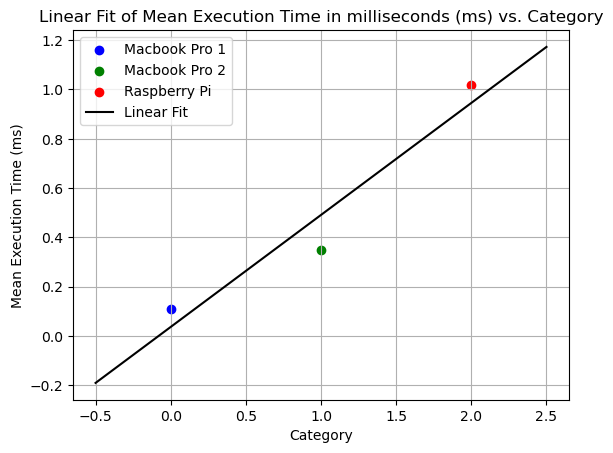

Slope: 0.45438867378116793
Intercept: 0.03673662900919383
Coefficient of determination (R^2): 0.9310047450742795


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


all_files = [file for file in os.listdir("TATDescriptionDataset") if file.endswith(".csv") and file != "VM.csv"]
means = []
categories = []


for file in all_files:
    data = pd.read_csv(os.path.join("TATDescriptionDataset", file))
    mean_execution_time = data["Execution Time"].mean()

    if "macbookpro1" in file.lower():
        category = 0
    elif "macbookpro2" in file.lower():
        category = 1
    elif "rasberrypi" in file.lower():
        category = 2

    means.append(mean_execution_time)
    categories.append(category)

for cat in range(3):
    category_mean = [means[i] for i in range(len(categories)) if categories[i] == cat]
    print(f"Mean Execution Time for Category {cat}: {np.mean(category_mean)} ms")

means = np.array(means)
categories = np.array(categories)

# Define colors for each category
colors = ['blue', 'green', 'red']

# Define labels for each category
category_labels = {
    0: 'Macbook Pro 1',
    1: 'Macbook Pro 2',
    2: 'Raspberry Pi'
}

slope, intercept, r_value, p_value, std_err = linregress(categories, means)

for cat in range(3):
    plt.scatter(categories[categories == cat], means[categories == cat], color=colors[cat], label=category_labels[cat])

x_extended = np.linspace(categories.min() - 0.5, categories.max() + 0.5, 100)

plt.plot(x_extended, intercept + slope*x_extended, color='black', label='Linear Fit')

plt.xlabel('Category')
plt.ylabel('Mean Execution Time (ms)')
plt.title('Linear Fit of Mean Execution Time in milliseconds (ms) vs. Category')
plt.grid(True)
plt.legend()
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("Coefficient of determination (R^2):", r_value**2)


# Apply 2 or 3 techniques you learned in the course to solve the problem. You may also try something new. You are free to use code from any machine learning library.

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

folder_path = "TATDescriptionDataset"
all_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]
data = pd.concat(dataframes, ignore_index=True)


data['RAM Size GB'] = data['RAM Size'].str.extract(r'(\d+)').astype(float)
data['RAM MHz'] = data['RAM Size'].str.extract(r'(\d+) MHz').astype(float)


data['RAM Size GB'] = np.where(data['Processor'].str.contains('RaspberryPi', case=False), data['RAM Size GB'], np.nan)
data['RAM MHz'] = np.where(data['Processor'].str.contains('RaspberryPi', case=False), np.nan, data['RAM MHz'])

processor_encoder = OneHotEncoder(sparse=False)
processor_encoded = processor_encoder.fit_transform(data[['Processor']])

processor_features = np.concatenate((processor_encoded, data[['RAM Size GB', 'RAM MHz']].values), axis=1)

target = data['Execution Time']

X_train, X_test, y_train, y_test = train_test_split(processor_features, target, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


pipeline.fit(X_train, y_train)


predictions = pipeline.predict(X_test)

mse = mean_squared_error(y_test, predictions)
# print(f"Mean Squared Error: {mse} ms")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse} ms")


Root Mean Squared Error: 0.07753242985485903 ms


/Users/KiranBhamidipaty/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/KiranBhamidipaty/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/KiranBhamidipaty/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


# Evaluate each method and compare them. In addition to the accuracy, you may also compare their training time, inference speeds, and memory consumption.

In [ ]:
import time
import psutil
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error

def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)

start_time = time.time()
pipeline.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
predictions = pipeline.predict(X_test)
inference_time = time.time() - start_time

memory_before_training = memory_usage()
pipeline.fit(X_train, y_train)
memory_after_training = memory_usage()
memory_consumption_training = memory_after_training - memory_before_training

memory_before_inference = memory_usage()
pipeline.predict(X_test)
memory_after_inference = memory_usage()
memory_consumption_inference = memory_after_inference - memory_before_inference

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Training Time: {training_time} seconds")
print(f"Inference Time: {inference_time} seconds")
print(f"Memory Consumption (Training): {memory_consumption_training} MB")
print(f"Memory Consumption (Inference): {memory_consumption_inference} MB")

Mean Squared Error: 0.0060112776791986355
Mean Absolute Error: 0.042438741375542204
Root Mean Squared Error: 0.07753242985485903
Training Time: 0.007178068161010742 seconds
Inference Time: 0.0008828639984130859 seconds
Memory Consumption (Training): 0.6875 MB
Memory Consumption (Inference): 0.375 MB


/Users/KiranBhamidipaty/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/KiranBhamidipaty/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/KiranBhamidipaty/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/KiranBhamidipaty/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warning

### Gradient Boosting Regression technique


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/TATDescriptionDataset"
!pwd

/content/drive/MyDrive/TATDescriptionDataset
/content/drive/MyDrive/TATDescriptionDataset


In [3]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Step 1: Data Preprocessing
file_paths = ['MacBookPro1.csv', 'MacBookPro2.csv', 'RasberryPi.csv']

# Load data from CSV files and add RAM size information
datasets = []
ram_sizes = ['8 GB 2133 MHz', '8 GB 1600 MHz', '4 GB']  # Sample RAM size data
for i, file in enumerate(file_paths):
    df = pd.read_csv(file)
    df['RAM Size'] = ram_sizes[i]
    datasets.append(df)

# Combine datasets if needed (not needed in this case)
data = pd.concat(datasets, ignore_index=True)

# Extract input features (X) and target variable (y)
X = data[['Time']]  # Only include 'Time' initially
y = data['Execution Time']

# Convert 'Time' column to numerical representation (Unix timestamp)
X.loc[:, 'Time'] = pd.to_datetime(X['Time']).astype(int) / 10**9 # Convert nanoseconds to seconds

# Add RAM Size column to X
X.loc[:, 'RAM Size'] = data['RAM Size']


# Step 2: Data Preprocessing Pipeline
processor_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Column transformer for numerical and categorical features
preprocessor = ColumnTransformer([
    ('processor', processor_pipeline, ['RAM Size']),
], remainder='passthrough')

# Step 3: Model Selection and Training Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-3-3df43ad9e1e1>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'RAM Size'] = data['RAM Size']


### Evaluation of the method and comparing the MSE, RMSE, training time, and, inference speeds

In [4]:
import time
# Step 5: Measure Training Time
start_time = time.time()
model_pipeline.fit(X_train, y_train)
training_time = (time.time() - start_time) * 1000  # Convert to milliseconds
print("Training Time:", training_time, "ms")

# Step 6: Model Evaluation
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE

print("Mean Squared Error (Gradient Boosting):", mse)
print("Mean Absolute Error (Gradient Boosting):", mae)
print("Root Mean Squared Error (Gradient Boosting):", rmse)


y_pred = model_pipeline.predict(X_test)
inference_time = (time.time() - start_time) * 1000
print("Inference Time:", inference_time)

Training Time: 493.91913414001465 ms
Mean Squared Error (Gradient Boosting): 0.0082097242590931
Mean Absolute Error (Gradient Boosting): 0.04137284353534633
Root Mean Squared Error (Gradient Boosting): 0.09060752871088086
Inference Time: 530.5752754211426


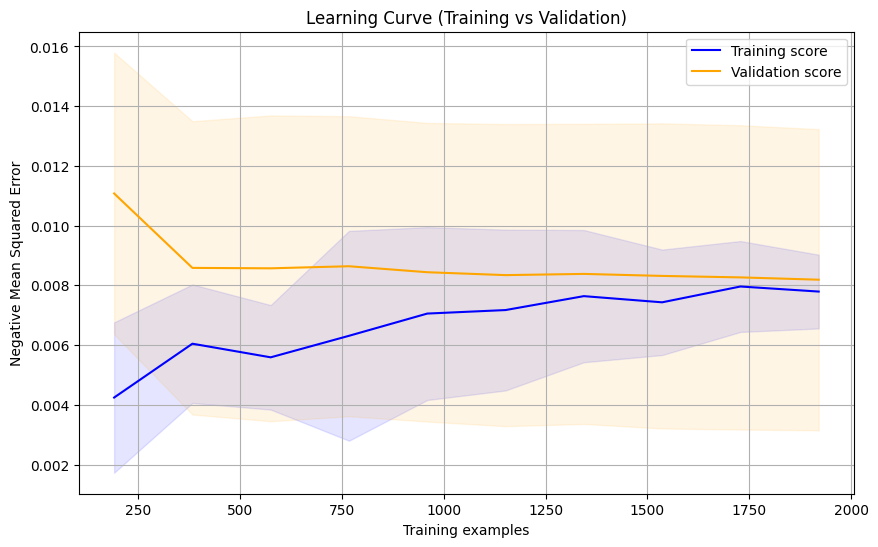

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define learning curve parameters
train_sizes = np.linspace(0.1, 1.0, 10)  # Training set sizes to use
cv = 5  # Number of cross-validation folds

# Generate learning curves
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=model_pipeline,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=cv,
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    shuffle=True,
    random_state=42
)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_scores_mean, label='Training score', color='blue')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, test_scores_mean, label='Validation score', color='orange')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

# Add labels and title
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve (Training vs Validation)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


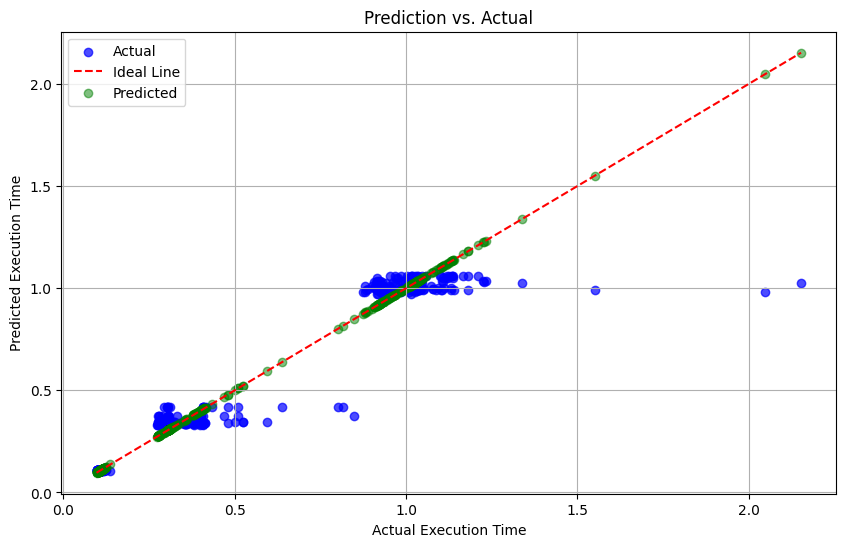

In [6]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted with different colors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.7)  # Blue for actual values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Line')
plt.scatter(y_test, y_test, color='green', label='Predicted', alpha=0.5)  # Green for predicted values
plt.title('Prediction vs. Actual')
plt.xlabel('Actual Execution Time')
plt.ylabel('Predicted Execution Time')
plt.legend()
plt.grid(True)
plt.show()
